___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as  sns
sns.set_theme(context = 'notebook', style = 'darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**We will do this using pandas datareader module.**

**We will use yahoo finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)

In [2]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC' ]
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016, 1, 1)

In [3]:
BAC = pdr.data.DataReader(tickers[0], 'yahoo', start, end)
C = pdr.data.DataReader(tickers[1], 'yahoo', start, end)
GS = pdr.data.DataReader(tickers[2], 'yahoo', start, end)
JPM = pdr.data.DataReader(tickers[3], 'yahoo', start, end)
MS = pdr.data.DataReader(tickers[4], 'yahoo', start, end)
WFC = pdr.data.DataReader(tickers[5], 'yahoo', start, end)

**I will Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. I'll set the keys argument equal to the tickers list.**

In [4]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)

**Setting the column name levels**

In [5]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [6]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.942654  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.582176  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.625427  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.574970  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.596584  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114265  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139023  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238125  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275291  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659279  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444874  
2006-01-04   31.799999  31.530001  10870000.0  20.207739  
2006-01-05   31.500000  31.495001  10158000.0  20.185305  
2006-01-06   31.580000  31.680000   8403800.0  20.303875  
2006-01-09   31.674999  31.674999   5619600.0  20.300673  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit!

**What is the max Close price for each bank's stock throughout the time period?**

In [7]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**I'll create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

**We can use pandas pct_change() method on the Close column to create a column representing this return value. I'll create a for loop that goes and for each Bank Stock Ticker creates this returns column and sets it as a column in the returns DataFrame.**

In [8]:
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker] = bank_stocks[ticker]['Close'].pct_change() 

In [9]:
returns.head()

BAC         C        GS       JPM        MS       WFC
Date                                                                  
2006-01-03       NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04 -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05  0.001288  0.004961 -0.000393  0.003029  0.002742 -0.001110
2006-01-06 -0.001501  0.000000  0.014169  0.007046  0.001025  0.005874
2006-01-09  0.000644 -0.004731  0.012030  0.016242  0.010586 -0.000158

**I'll Create a pairplot using seaborn of the returns dataframe to find which stock stands out?**

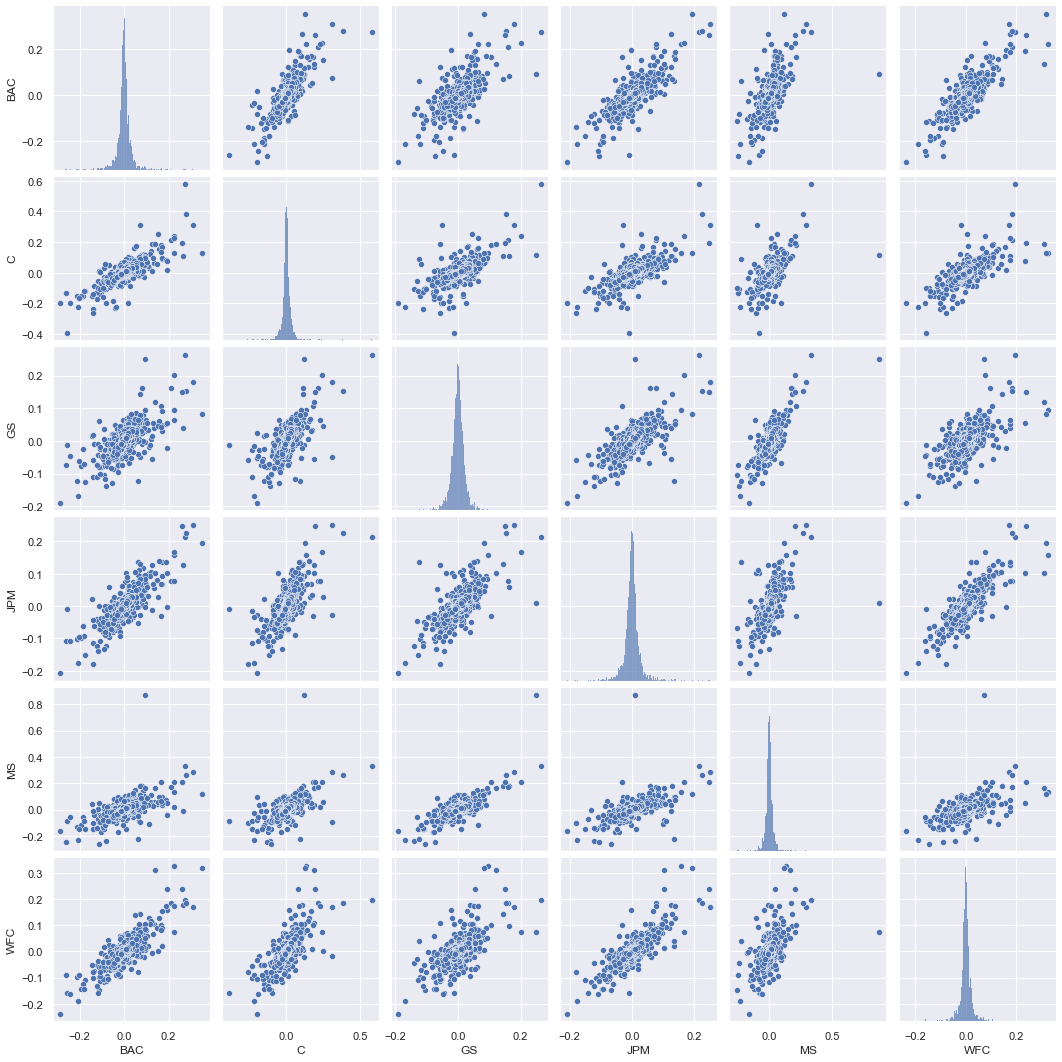

In [10]:
sns.pairplot(data = returns[1:])

Citi group stands out as they had experienced a crash in the given time frame.

**Using this returns DataFrame, I'll figure out on what dates each bank stock had the best and worst single day returns.**

In [31]:
# Method 1 - min
returns.idxmin()

BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

#### 4 of the banks have the same day for their least returns(2009-01-20) signifying sometrhing major happened on that day.

In [32]:
# Method 1 - max
returns.idxmax()

BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [29]:
# Method 2 - min
for ticker in tickers:
    date = returns[returns[ticker]==returns.min()[ticker]].index
    print(f'{ticker} Return = {date.date}')

BAC Return = [datetime.date(2009, 1, 20)]
C Return = [datetime.date(2009, 2, 27)]
GS Return = [datetime.date(2009, 1, 20)]
JPM Return = [datetime.date(2009, 1, 20)]
MS Return = [datetime.date(2008, 10, 9)]
WFC Return = [datetime.date(2009, 1, 20)]


In [30]:
# Method 2 - max
for ticker in tickers:
    date = returns[returns[ticker]==returns.max()[ticker]].index
    print(f'{ticker} Return = {date.date}')

BAC Return = [datetime.date(2009, 4, 9)]
C Return = [datetime.date(2008, 11, 24)]
GS Return = [datetime.date(2008, 11, 24)]
JPM Return = [datetime.date(2009, 1, 21)]
MS Return = [datetime.date(2008, 10, 13)]
WFC Return = [datetime.date(2008, 7, 16)]


**Citigroup's largest drop and biggest gain were very close to one another, signifying something significant happened on that day.**

**I'll take a look at the standard deviation of the returns,to see which stock I would classify as the riskiest over the entire time period and Which I would classify as the riskiest for the year 2015?**

In [33]:
# Entire period
returns.std(axis = 0)

BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

Citigroup has the greatest standard deviation, meaning it is the riskiest stock for the entire given period.

In [16]:
# for 2015 only
returns.loc['2015'].std(axis = 0)

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

Morgan Stanley has the greatest standard deviation, meaning it is the riskiest stock for the yaer 2015.

**I'll create a distplot using seaborn of the 2015 returns for Morgan Stanley**

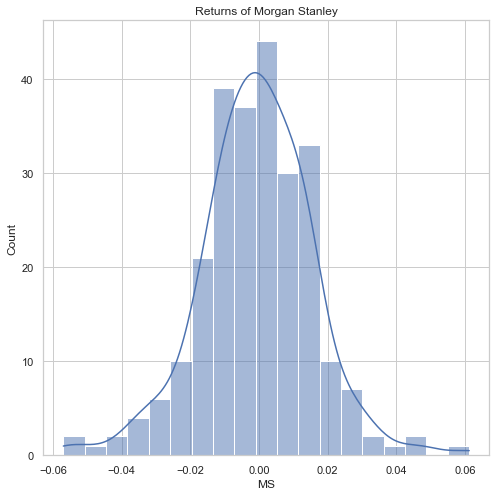

In [34]:
plt.figure(figsize = (8,8))
sns.histplot( data = returns.loc['2015']['MS'], kde = True)
plt.title('Returns of Morgan Stanley'); 

**I'll create a distplot using seaborn of the 2008 returns for CitiGroup**

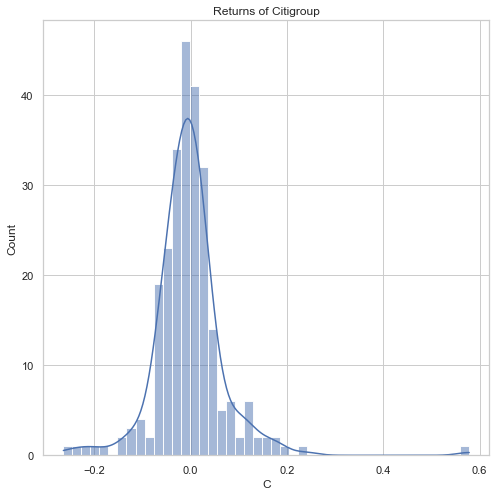

In [35]:
plt.figure(figsize = (8,8))
sns.histplot( data = returns.loc['2008']['C'], kde = True)
plt.title('Returns of Citigroup'); 

____
# More Visualization

A lot of this project will focus on visualizations.

### Imports

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotly Method Imports
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()
init_notebook_mode(connected=True)

**I'll create a line plot showing Close price for each bank for the entire index of time with the .xs method**

<AxesSubplot:xlabel='Date'>

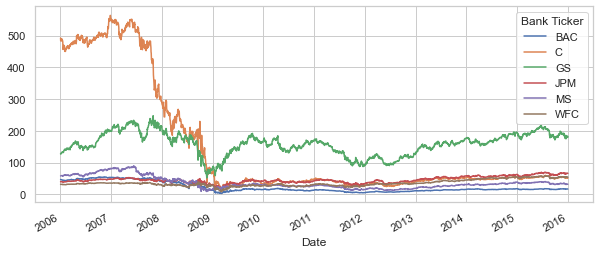

In [37]:
bank_stocks.xs(key = "Close", axis = 1, level = 'Stock Info').plot(figsize =(10,4))

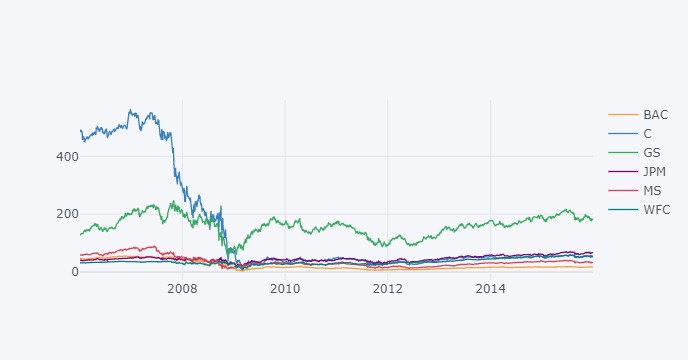

In [39]:
# Plotly interactive visualization
bank_stocks.xs(key = "Close", axis = 1, level = 'Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**I'll plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

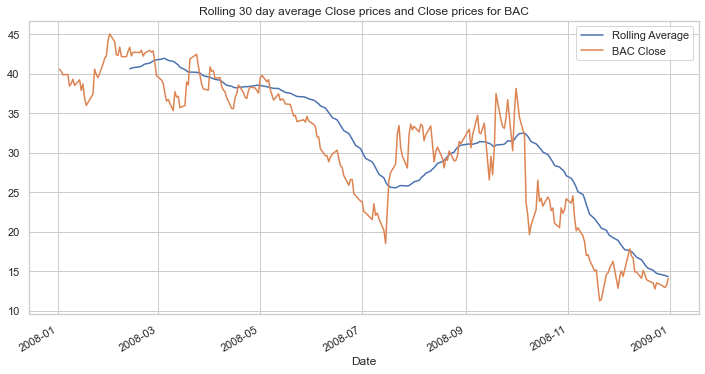

In [40]:
bank_stocks.loc['2008'].xs(key = "Close", level = 'Stock Info', 
                           axis = 1)['BAC'].rolling(window = 30).mean().plot(figsize = (10,8)
                                                                            , label = 
                                                                        'Rolling Average')
bank_stocks.loc['2008'].xs(key = "Close", level = 'Stock Info', 
                           axis = 1)['BAC'].plot(figsize = (12,6), label = 'BAC Close')

plt.title('Rolling 30 day average Close prices and Close prices for BAC')
plt.legend();

**I'll Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

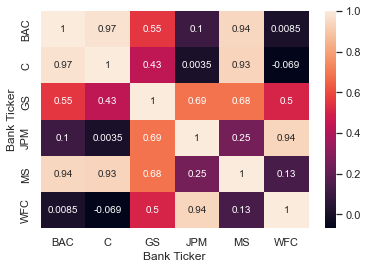

In [41]:
sns.heatmap(bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).corr(), annot = True)

**I'll Use seaborn's clustermap to cluster the correlations together:**

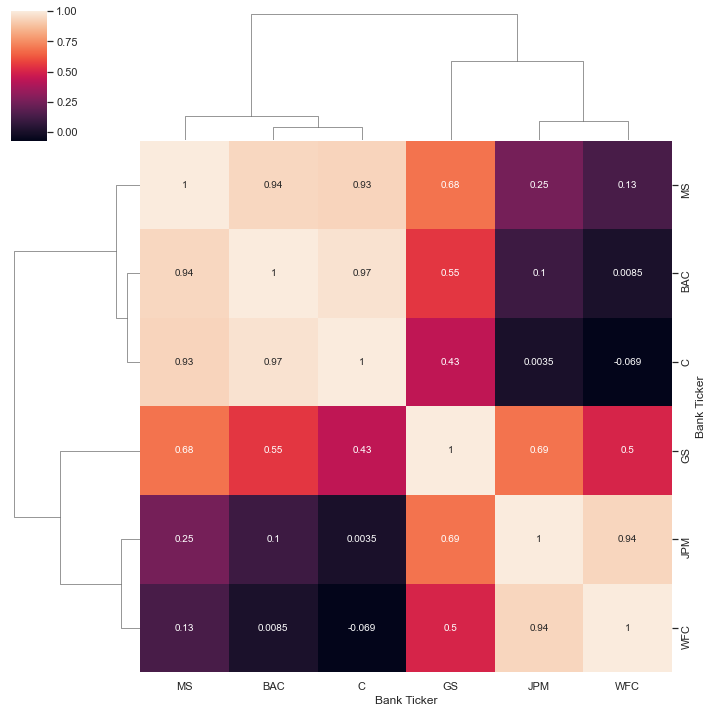

In [42]:
sns.clustermap(bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).corr(),
            annot = True)

# Part 2 

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

**I'll use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

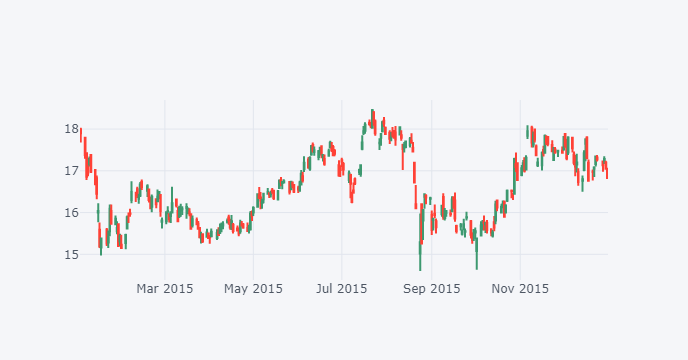

In [43]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle')

**I'll use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

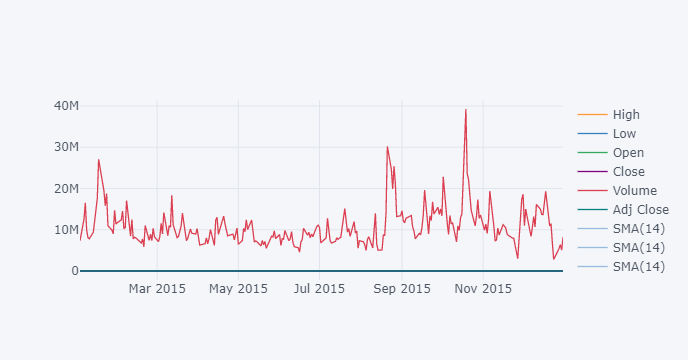

In [44]:
bank_stocks['MS'].loc['2015'].ta_plot(study = 'sma')

**I'll Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

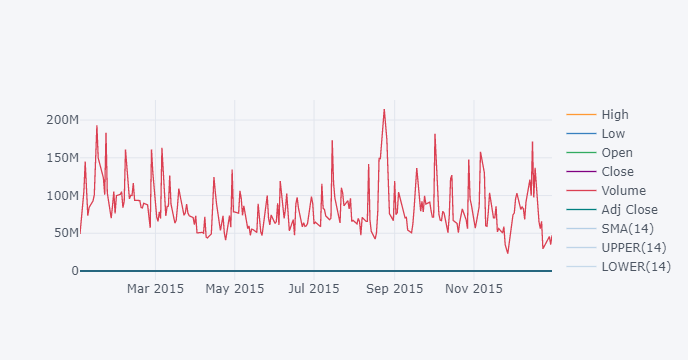

In [45]:
bank_stocks['BAC'].loc['2015'].ta_plot(study = 'boll')

---
# END
---